In [98]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [99]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.getcwd())
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [100]:
path = get_path('rntn_train_validate_and_test_wordnet_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/deep-knowledge-modelling/results/rntn_train_validate_and_test_wordnet_cost.csv'

In [101]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [102]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,0,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,1,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,2,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,3,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,4,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [103]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,0,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,1,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,2,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,3,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,4,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [104]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_experiment,cost_validation_experiment,cost_test_experiment
0,1,150237.140625,7878.121094,31809.474609,2113.146729,4979.330078,20205.656250
1,2,134341.593750,7802.993164,31494.505859,1341.437378,8379.241211,33910.527344
2,3,124111.351562,7742.378418,31240.869141,995.285461,7257.853516,29306.863281
3,4,117083.093750,7698.704102,31055.728516,944.283264,5706.655273,22706.216797
4,5,111444.000000,7660.360840,30888.564453,865.563354,5906.799805,23574.556641


In [106]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_experiment'], axis=1)
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_experiment,cost_validation_experiment
0,1,150237.140625,7878.121094,2113.146729,4979.330078
1,2,134341.593750,7802.993164,1341.437378,8379.241211
2,3,124111.351562,7742.378418,995.285461,7257.853516
3,4,117083.093750,7698.704102,944.283264,5706.655273
4,5,111444.000000,7660.360840,865.563354,5906.799805


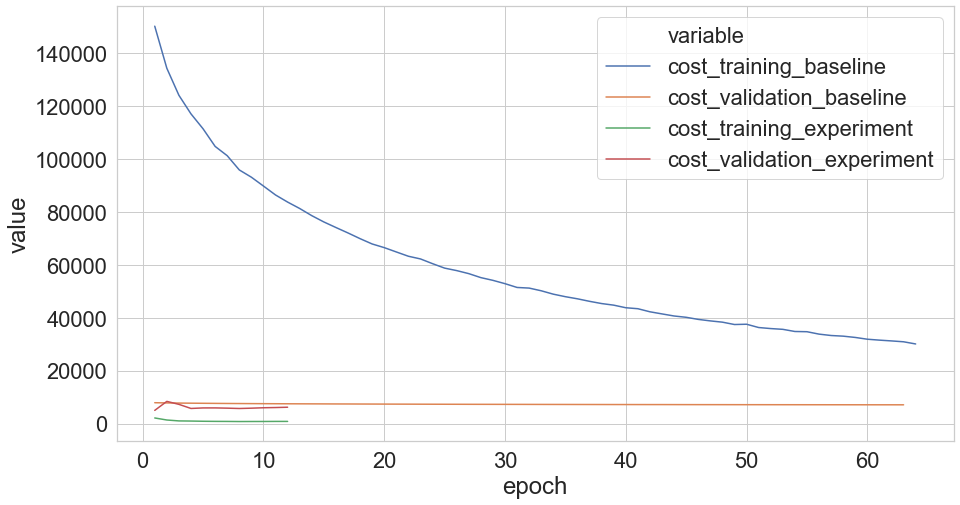

In [116]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('Wordnet_Cost_Results.png', bbox_inches = "tight", format='PNG')

In [108]:
path = get_path('rntn_train_validate_and_test_wordnet_accuracy.csv', 'results')
path

'/Users/luyolomagangane/workspace/deep-knowledge-modelling/results/rntn_train_validate_and_test_wordnet_accuracy.csv'

In [109]:
results_accuracy = pd.read_csv(path)
results_accuracy.head()

,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,0.5361,0.504408,0.504647,0.757846,0.617095,0.622392
1,0.5782,0.510540,0.510290,0.867881,0.658107,0.654116
2,0.6109,0.514565,0.515364,0.897714,0.658490,0.662083
3,0.6384,0.518781,0.519110,0.911275,0.663281,0.665450
4,0.6619,0.522997,0.522809,0.932584,0.667305,0.667014


In [110]:
results_accuracy = results_accuracy.reset_index()
results_accuracy.head()

,index,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,0,0.5361,0.504408,0.504647,0.757846,0.617095,0.622392
1,1,0.5782,0.510540,0.510290,0.867881,0.658107,0.654116
2,2,0.6109,0.514565,0.515364,0.897714,0.658490,0.662083
3,3,0.6384,0.518781,0.519110,0.911275,0.663281,0.665450
4,4,0.6619,0.522997,0.522809,0.932584,0.667305,0.667014


In [112]:
results_accuracy = results_accuracy.rename(columns={'index': 'epoch'})
results_accuracy.head()

,epoch,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,0,0.5361,0.504408,0.504647,0.757846,0.617095,0.622392
1,1,0.5782,0.510540,0.510290,0.867881,0.658107,0.654116
2,2,0.6109,0.514565,0.515364,0.897714,0.658490,0.662083
3,3,0.6384,0.518781,0.519110,0.911275,0.663281,0.665450
4,4,0.6619,0.522997,0.522809,0.932584,0.667305,0.667014


In [113]:
results_accuracy['epoch'] += 1
results_accuracy.head()

,epoch,accuracy_training_baseline,accuracy_validation_baseline,accuracy_test_baseline,accuracy_training_experiment,accuracy_validation_experiment,accuracy_test_experiment
0,1,0.5361,0.504408,0.504647,0.757846,0.617095,0.622392
1,2,0.5782,0.510540,0.510290,0.867881,0.658107,0.654116
2,3,0.6109,0.514565,0.515364,0.897714,0.658490,0.662083
3,4,0.6384,0.518781,0.519110,0.911275,0.663281,0.665450
4,5,0.6619,0.522997,0.522809,0.932584,0.667305,0.667014


In [114]:
results_accuracy = results_accuracy.drop(['accuracy_test_baseline', 'accuracy_test_experiment'], axis=1)
results_accuracy.head()

,epoch,accuracy_training_baseline,accuracy_validation_baseline,accuracy_training_experiment,accuracy_validation_experiment
0,1,0.5361,0.504408,0.757846,0.617095
1,2,0.5782,0.510540,0.867881,0.658107
2,3,0.6109,0.514565,0.897714,0.658490
3,4,0.6384,0.518781,0.911275,0.663281
4,5,0.6619,0.522997,0.932584,0.667305


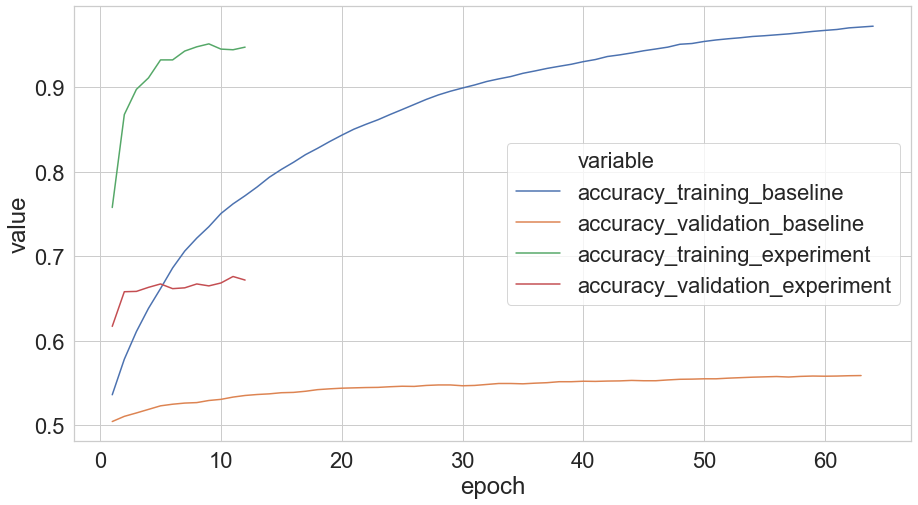

In [115]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_accuracy, ['epoch']))